# `osu-matplotlib-theme`

This directory contains theme files to be used with the Python plotting library [matplotlib](https://matplotlib.org/). The themes are adapted to visually match the style of published article pages on the [osu! website](https://osu.ppy.sh/home).

The files here are mostly intended to be used by developers of star rating and performance points algorithms used in osu! who may wish to better convey technical changes in the aforementioned algorithms using graphs inlined into development articles.

Additionally, a second theme is also provided, which matches the appearance of the osu! wiki, allowing creation of graphs for wiki articles with matplotlib.

Theme files contained within are based on graphs previously embedded in articles describing changes to star rating/performance points algorithms:

* [Performance Points Updates (Jan 2021)](https://osu.ppy.sh/home/news/2021-01-14-performance-points-updates)
* [Performance Points & Star Rating Updates (Jul 2021)](https://osu.ppy.sh/home/news/2021-07-27-performance-points-star-rating-updates)
* [Performance Points & Star Rating Updates (Nov 2021)](https://osu.ppy.sh/home/news/2021-11-09-performance-points-star-rating-updates)

The repository contains the following main files:

* `.mplstyle` files: matplotlib [style sheets](https://matplotlib.org/stable/tutorials/introductory/customizing.html) that apply most of boilerplate styling you may need. The following variants are included:
    - `osu-news.mplstyle` is intended to be used for graphs on newsposts,
    - `osu-wiki.mplstyle` is intended to be used for graphs on wiki articles.

* `osu_cmap.py`: a python script declaring a matplotlib discrete [colour map](https://matplotlib.org/stable/tutorials/colors/colormaps.html) that you can use to colour data series with.

Both files intend to match the osu! website design language.

To use these themes, you will obviously need to install matplotlib. Data manipulation packages such as [numpy](https://numpy.org/) or [pandas](https://pandas.pydata.org/) may also come in handy:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Additionally, the theme uses the [Inter](https://rsms.me/inter/) font for displaying textual content. Please make sure you have a system-wide installation of the font in question, or otherwise graphs may not look as intended.

## Usage examples

### Simple X-Y line plot

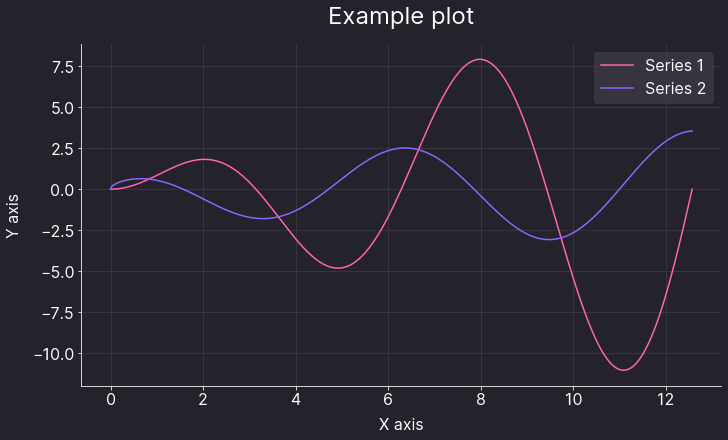

In [2]:
# generate some fake data to plot
xs = np.linspace(0, 4 * np.pi, 1000)
ys = xs * np.sin(xs)
zs = np.sqrt(xs) * np.cos(xs)

# import and use the colormap
from osu_cmap import OSU_CMAP
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", OSU_CMAP.colors)

# use the theme
# note that this is being used in a `with` block to provide temporary styling
# (https://matplotlib.org/stable/tutorials/introductory/customizing.html#temporary-styling)
with plt.style.context('./osu-news.mplstyle'):
    plt.plot(xs, ys)
    plt.plot(xs, zs)

    plt.title('Example plot')
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.legend(['Series 1', 'Series 2'])

    plt.show()

### Bar plot with more complications

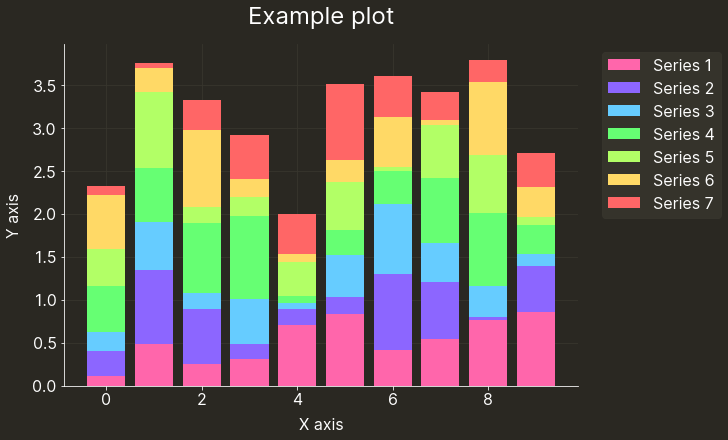

In [3]:
# generate some fake data to plot
xs = range(10)
category_count = 7

# import and use the colormap
from osu_cmap import OSU_CMAP
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", OSU_CMAP.colors)

# use the theme
# note that this is being used in a `with` block to provide temporary styling
# (https://matplotlib.org/stable/tutorials/introductory/customizing.html#temporary-styling)
with plt.style.context('./osu-wiki.mplstyle'):
    bottom = np.zeros(10)
    
    # plot some fake data
    for i in range(category_count):
        ys = np.random.rand(len(xs))
        plt.bar(xs, ys, bottom=bottom, zorder=i+2)
        bottom += ys

    plt.title('Example plot')
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    # even though the style does most of the job, sometimes stuff needs to be jiggled to work
    # (in this case we're putting the legend outside of the plot)
    plt.legend([f'Series {i+1}' for i in range(category_count)],
               bbox_to_anchor=(1.03, 1),
               loc='upper left')

    plt.show()